# Week 4 Assignment - Machine Learning CSU44061
### Ernests Kuznecovs
### 17332791

## (i) Dataset 1

I decided to set some data(33%) aside to test it at the end.

In [1]:
# id:25-50-25-0 
import numpy as np
import pandas as pd
df = pd.read_csv("week4_1.csv", comment='#')
xy = df.to_numpy()


from sklearn.model_selection import train_test_split

X = xy[:, 0:2]
y = xy[:, 2]

X, X_test, y, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Just to get a feel for the first data set I plotted it.

Text(0, 0.5, 'y')

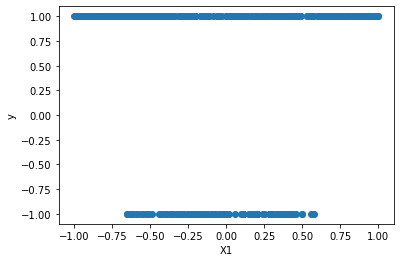

In [2]:
import matplotlib.pyplot as plt 
plt.scatter(X[:, 0], y)
plt.xlabel("X1") ; plt.ylabel("y")

Text(0, 0.5, 'y')

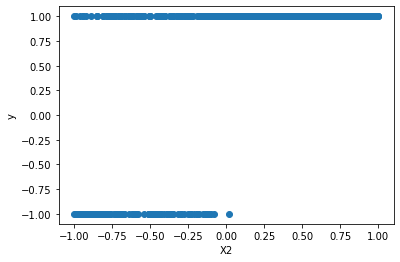

In [3]:
import matplotlib.pyplot as plt 
plt.scatter(X[:, 1], y)
plt.xlabel("X2") ; plt.ylabel("y")

Text(0.5, 0, 'y')

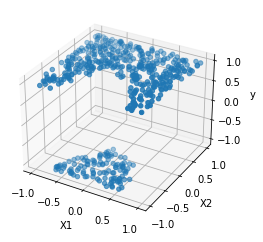

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

Seems like there is a quadratic curve in the data so the number of polynomail features 
to request from sklearn would be q=2 which will give   
X = \[a, b\]     
Xpoly = \[1, a, b, a<sup>2</sup>, ab, b<sup>2</sup>\]     
But there may come a time when the data is not visualisable so for this exercise I will try rely on cross-validation to choose a suitable q.

### (a)    
Code below declares a function that takes the model to use and also takes in hyperparameters like the weight of the cost function penalty, number of polynomial features, and k for kNN when using kNN model.  
  
The function the creates the model with the given input arguments.
   
The function then creates `splits` different splits of the data and for each set of splits it trains the model and calculates the Mean Squared Error of the prediction on the testing split within the set of splits.   
   
The function appends each of the mean squared erros to a list and then using the list, the mean, variance, and standard deviation of the list are returned.

In [5]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.neighbors import KNeighborsClassifier

def kfoldMeanVar(splits, C=1, q=2, m="LogL2", kNN_k=10, kNN_gamma="none"):
    Xpoly = PolynomialFeatures(q).fit_transform(X)
    
    if (kNN_gamma=="none"):
        model = KNeighborsClassifier(n_neighbors=kNN_k, weights='uniform')
    else:
        gaussian_kernel = lambda distances: np.exp(-1 * kNN_gamma * (distances**2)) 
        model = KNeighborsClassifier(n_neighbors=kNN_k, weights=gaussian_kernel)
        
    if (m=="LogL2"):
        model = LogisticRegression(penalty='l2', solver='lbfgs', C=C, max_iter=10000)
    
    kf = KFold(n_splits=splits)
    meanSquareErrors = []
    for train, test in kf.split(Xpoly):
        model = model.fit(Xpoly[train], y[train])
        ypred = model.predict(Xpoly[test])
        mse = mean_squared_error(y[test],ypred)
        meanSquareErrors.append(mse)
    return np.mean(meanSquareErrors), np.var(meanSquareErrors), np.std(meanSquareErrors)

##### (i) maximum order polynomail   
   
To find a suitable order polynomial a plot with q(order of polynomials) assigned to the x axis and mean MSE will be assigned to the y axis with standard deviation as the error bars.   
   
A split of 10 will be used, for no particular reason apart from it is a common number of splits to do.  
   
C will be kept at 5 as it is an L2 for the reason that it is usually 5 for L2 penalty.

Text(0.5, 1.0, '10 fold log reg with L2 C=5 ; std error bars')

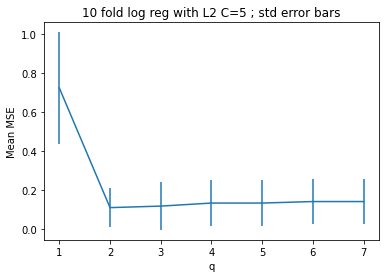

In [6]:
qs = [1, 2, 3, 4, 5, 6, 7]
meanMSE = []
stdMSE = []
for q in qs:
    mean, var, std = kfoldMeanVar(10, C=5, q=q)
    meanMSE.append(mean)
    stdMSE.append(std)

plt.errorbar(qs, meanMSE, stdMSE)
plt.xlabel("q") ; plt.ylabel("Mean MSE")
plt.title("10 fold log reg with L2 C=5 ; std error bars")

At q = 2, it seems like the Mean MSE has essentially reached it's minumum.   
The relatively small error bar on q=2 roughlty indicates that the model is fitting to the noise less compared to other values of q.  
   
Therefore the maximum q to choose is 2, as a q any higher will be fitting to the noise of the data.

##### (ii) weight C of penalty in the cost function

The same process as above is repeated but this time with different values of C.   
The q value of 2 will be used, as it is most relevant for the final model as discovered by the above graph.

There is also the risk of the C value being biased in the graph as we used C=5 to select the seemingly best fitting q=2.

Text(0.5, 1.0, '10 fold log reg with L2 q=2 ; std error bars')

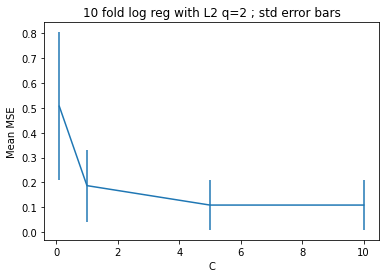

In [7]:
Cs = [0.1, 1, 5, 10]
meanMSE = []
stdMSE = []
for C in Cs:
    mean, var, std = kfoldMeanVar(10, C=C, q=2)
    meanMSE.append(mean)
    stdMSE.append(std)

plt.errorbar(Cs, meanMSE, stdMSE)
plt.xlabel("C") ; plt.ylabel("Mean MSE")
plt.title("10 fold log reg with L2 q=2 ; std error bars")

From the above graph, I would pick the C value of 5 as it roughly seems to be the minimal Mean MSE, it doesn't seem like increasing C will bring much more benefit, so choosing a C value of 5 will keep the parameters normalied to a lower number for the model.

In [8]:
Xpoly = PolynomialFeatures(2).fit_transform(X)
modelLogReg = LogisticRegression(penalty='l2', solver='lbfgs', C=5).fit(Xpoly, y)

#### (b)   
Using the same function, except with a kNN setup. Within the function the kNN model takes kNN_k as the number of neighbours.

Text(0.5, 1.0, '10 fold kNN q=1 ; std error bars')

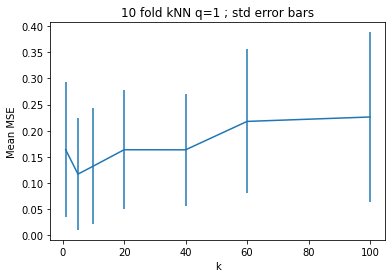

In [9]:
ks = [1, 5, 10, 20, 40, 60, 100]
meanMSE = []
stdMSE = []
for k in ks:
    mean, var, std = kfoldMeanVar(10, q=1, m="knn", kNN_k=k)
    meanMSE.append(mean)
    stdMSE.append(std)

plt.errorbar(ks, meanMSE, stdMSE)
plt.xlabel("k") ; plt.ylabel("Mean MSE")
plt.title("10 fold kNN q=1 ; std error bars")

From the graph, k=5 looks good. At k=5 it is roughly at a minimal MSE with a minmal standard deviation.

Text(0.5, 1.0, '10 fold kNN k=5 ; std error bars')

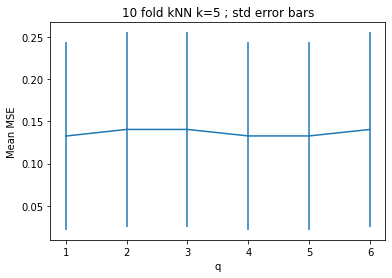

In [10]:
qs = [1,2,3,4,5,6]
meanMSE = []
stdMSE = []
for q in qs:
    mean, var, std = kfoldMeanVar(10, q=q, m="knn", kNN_k=10)
    meanMSE.append(mean)
    stdMSE.append(std)

plt.errorbar(qs, meanMSE, stdMSE)
plt.xlabel("q") ; plt.ylabel("Mean MSE")
plt.title("10 fold kNN k=5 ; std error bars")

Keeping in mind the bias of selecting q=1 when choosing k...
   
It seems like augmenting the polynomail features has little to no effect.   
With error bars that big, the slight decrease of the Mean MSE as q increased could just 
be the noise of the data.   
   
This could be because kNN doesn't really rely on some polynomail function to make a prediction, but relies on the neareast datapoints of the input.
   
So to keep the model as simple as possible I'll choose q=1(unaltered features).

In [11]:
modelkNN = KNeighborsClassifier(n_neighbors=5, weights='uniform').fit(X, y)

### (c)

A confusion matrix is generated and printed using sklearn.metrics

Top left: True Negatives.   
Bottom left: False Negatives   

Top right: False Positives   
Bottom right: True Positives

In [12]:
from sklearn.metrics import confusion_matrix
Xpoly = PolynomialFeatures(2).fit_transform(X_test)
print(confusion_matrix(y_test, modelLogReg.predict(Xpoly)))

[[ 61   4]
 [  2 186]]


In [13]:
print(confusion_matrix(y_test, modelkNN.predict(X_test)))

[[ 61   4]
 [  5 183]]


As you can see there is a small difference between the two models.   
kNN has slightly more false negatives.

For the baseline I chose a model that chooses a random value as apposed to one that picks the most common y value.   
   
This is because choosing the most common y value is easily deducible without needing to use python and looking at a confusion matrix (either TP or TN will be 100% or 0% and either FP or FN will be 100% or 0%).   
   
The code below generates an array of the same size as num y values and instansiates them to values between 0 and 1, the lambda function makes values below 0.5 -1 and above 0.5 +1.

In [14]:
f = lambda x: -1.0 if x < 0.5 else 1.0
baselineYpred = [f(y) for y in np.random.rand(y_test.shape[0])]
cm = confusion_matrix(y_test, baselineYpred)
print(cm)

[[33 32]
 [89 99]]


Baseline predicts significantly worse in all aspects.

### (d)   
The the predition probablity is given to the roc_curve function which adjusts the descision boundary and plots how the True Positive Rate and False Positive Rate changes as the descision boundary moves.   
   
Since there is no (real) descision boundary for the baseline, it is just a single point.

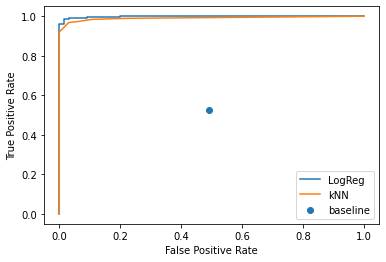

In [15]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, modelLogReg.decision_function(Xpoly))
plt.plot(fpr, tpr, label="LogReg")

# taking probability estimate of kNN model
fpr, tpr, _ = roc_curve(y_test, modelkNN.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="kNN")

fpr = cm[0,1] / (cm[0,0]+ cm[0,1]) # false positive rate = FP/ TN + FP
tpr = cm[1,1] / (cm[1,1]+ cm[1,0]) # true positive rate = TP / TP + FN
plt.scatter(fpr, tpr, label="baseline")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

Both the models massively outperform the baseline (FPR of 0.55, TPR of 0.5)

### (e)

Judging by the results of (c) and (d), both models are identical going by the metrics.    
In (c) the confusion matrix is quite similar, but KNN generated more false negatives. 
   
In (d) the linear regression seems to slightly outperform the kNN. This might be 
because kNN performs better on many datapoints(as it uses them directly), and removing 1/3 of the training data and then using the test data to predict is quite detremental for kNN.
  
I would use Logistic Regression as it is modelled by a curve, if the nature of the task sometimes includes points that are outside the range of the training data, then the Logisitc Regression would be able to handle that better as its using a curve to approximate the output which spans beyond the training set, whereas kNN might have some trouble as it will look at the nearest neighbours of the training set, which in practice might not be that near.

# (ii)


In [16]:
df = pd.read_csv("week4_2.csv", comment='#')
xy = df.to_numpy()
X = xy[:, 0:2]
y = xy[:, 2]

To get a better feel for the data, it's plotted.

Text(0.5, 0, 'y')

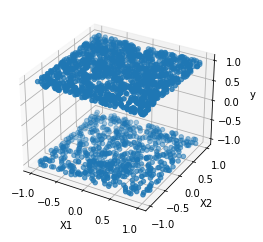

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

This one just looks like noise.

Since there cases visualisations aren't fully available, I will see how to use the tools to spot that its noise.

##### (i)    
Feature polynomials are tested.

Text(0.5, 1.0, '10 fold log reg with L2 C=5 ; std error bars')

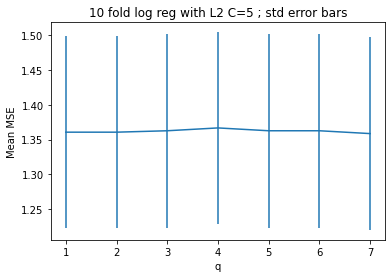

In [18]:
qs = [1, 2, 3, 4, 5, 6, 7]
meanMSE = []
stdMSE = []
for q in qs:
    mean, var, std = kfoldMeanVar(10, C=5, q=q)
    meanMSE.append(mean)
    stdMSE.append(std)

plt.errorbar(qs, meanMSE, stdMSE)
plt.xlabel("q") ; plt.ylabel("Mean MSE")
plt.title("10 fold log reg with L2 C=5 ; std error bars")

The appearance of the same mean and error bars across q could be an indication that the data is just noise.   
   
I will just choose q=1 as it is the simplest.

##### (ii)    
Cost penalty weight C.

Text(0.5, 1.0, '10 fold log reg with L2 q=1 ; std error bars')

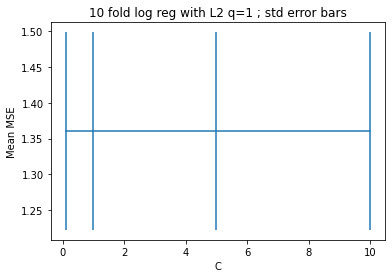

In [19]:
Cs = [0.1, 1, 5, 10]
meanMSE = []
stdMSE = []
for C in Cs:
    mean, var, std = kfoldMeanVar(10, C=C, q=1)
    meanMSE.append(mean)
    stdMSE.append(std)

plt.errorbar(Cs, meanMSE, stdMSE)
plt.xlabel("C") ; plt.ylabel("Mean MSE")
plt.title("10 fold log reg with L2 q=1 ; std error bars")

Same sort of uniformality across C, also an indicator that data is just noise.   
   
I will just choose C=5 as it is common for L2 penalty.

In [20]:
modelLogReg = LogisticRegression(penalty='l2', solver='lbfgs', C=5).fit(X, y)

### (b)   
Same precedure as for the first dataset, except I have added an extra k values i.e 1000, and 1762.

Text(0.5, 1.0, '10 fold kNN q=1 ; std error bars')

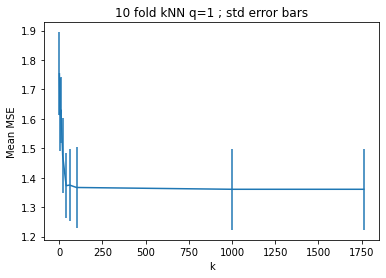

In [21]:
ks = [1, 5, 10, 20, 40, 60, 100, 1000, 1762]
meanMSE = []
stdMSE = []
for k in ks:
    mean, var, std = kfoldMeanVar(10, q=1, m="knn", kNN_k=k)
    meanMSE.append(mean)
    stdMSE.append(std)

plt.errorbar(ks, meanMSE, stdMSE)
plt.xlabel("k") ; plt.ylabel("Mean MSE")
plt.title("10 fold kNN q=1 ; std error bars")

Once the number of neighbours becomes the whole dataset, since it is a linear weighting system for the neighbours, it is effectively just using the most common y value of the entire dataset for its classification.   
   
I will use k=1762 for number of neighbours, as its 9/10's of the dataset (1/10 is used for validation in the kfold)

In [22]:
modelkNN = KNeighborsClassifier(n_neighbors=1762, weights='uniform').fit(X, y)

### (c)   
Top left: True Negatives.   
Bottom left: False Negatives   

Top right: False Positives   
Bottom right: True Positives

In [23]:
print(confusion_matrix(y, modelLogReg.predict(X)))

[[   0  666]
 [   0 1292]]


In [24]:
print(confusion_matrix(y, modelkNN.predict(X)))

[[   0  666]
 [   0 1292]]


In [25]:
f = lambda x: -1.0 if x < 0.5 else 1.0
baselineYpred = [f(y) for y in np.random.rand(y.shape[0])]
cm = confusion_matrix(y, baselineYpred)
print(cm)

[[326 340]
 [653 639]]


Both the Logistic Regression model and kNN model are showing the strategy of a baseline model that predicts the most common y value. i.e predicting only postiive.  
  
They both have 1292 true positives.    
But no ture negatives or false negatives.   
   
The baseline is using the same strategy as for the first dataset and choosing randomly.

### (d)   

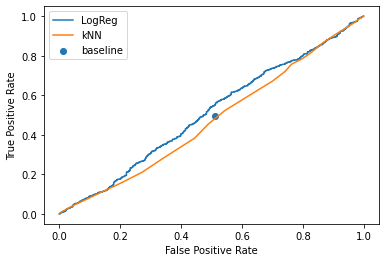

In [26]:
fpr, tpr, _ = roc_curve(y, modelLogReg.decision_function(X))
plt.plot(fpr, tpr, label="LogReg")

# taking probability estimate of kNN model
fpr, tpr, _ = roc_curve(y, modelkNN.predict_proba(X)[:,1])
plt.plot(fpr, tpr, label="kNN")

fpr = cm[0,1] / (cm[0,0]+ cm[0,1]) # false positive rate = FP/ TN + FP
tpr = cm[1,1] / (cm[1,1]+ cm[1,0]) # true positive rate = TP / TP + FN
plt.scatter(fpr, tpr, label="baseline")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

Both models are performing at the same level as the random baseline.   
   
Although the LogReg seems to slighly perform better than the kNN, the trend in the data is most likely a coincidence of the noise.   
   
I would not use any of the classifiers, as they don't even perform any better than choosing randomly like the baseline does.